       Status    Created                    TipodeOcorrênciaIdentifica
0     Fechado 2022-07-08  CP-Serviços concomitantes em rotas distintas
1      Aberto 2022-07-08             CP-Serviços deixado de programar.
2  Contestada 2022-07-08                     CP-Serviço Fora da janela
3     Fechado 2022-07-08         CP-Programação de serviço inexequível
4     Fechado 2022-07-11                  CP-Cliente fora do Perímetro


17:21:14 - cmdstanpy - INFO - Chain [1] start processing
17:21:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\BR05307045\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\BR05307045\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


            ds      yhat  yhat_lower  yhat_upper
0   2022-07-08  4.423637   -4.566286   13.765352
1   2022-07-11  6.033358   -3.174226   14.974538
2   2022-07-12  5.006199   -3.897648   14.305080
3   2022-07-15  4.003728   -5.483873   13.380217
4   2022-07-18  6.073191   -2.818691   14.767908
..         ...       ...         ...         ...
682 2024-11-21  8.170403   -0.424951   17.377195
683 2024-11-22  6.309917   -2.777291   15.513033
684 2024-11-23 -1.255764  -10.242431    7.882337
685 2024-11-24 -3.984138  -12.807428    5.387951
686 2024-11-25  7.216054   -1.542138   16.574036

[687 rows x 4 columns]


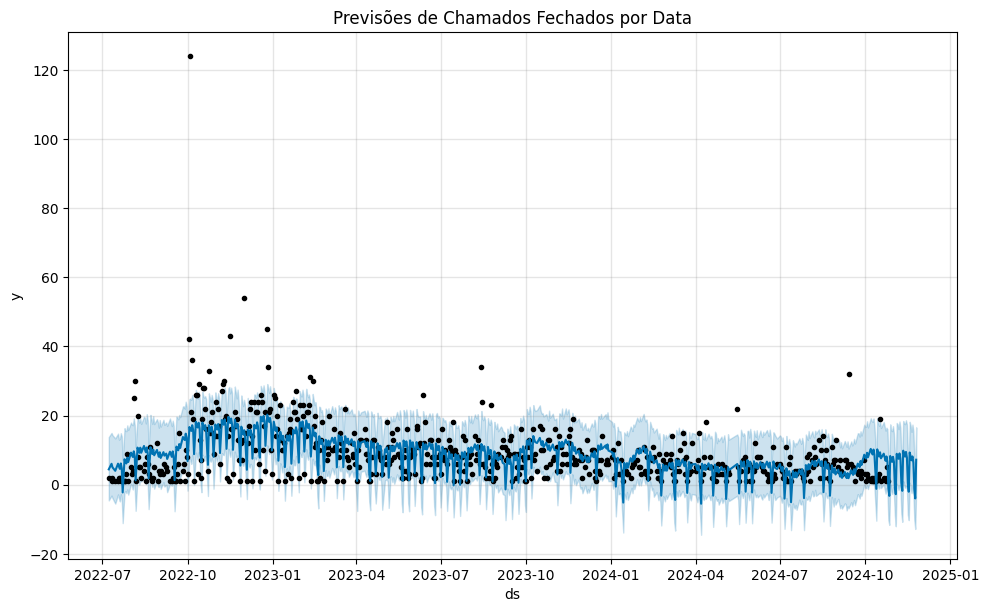

          Data  Previsão (Chamados Fechados)  Limite Inferior (Confiança)  \
0   2022-07-08                      4.423637                    -4.566286   
1   2022-07-11                      6.033358                    -3.174226   
2   2022-07-12                      5.006199                    -3.897648   
3   2022-07-15                      4.003728                    -5.483873   
4   2022-07-18                      6.073191                    -2.818691   
..         ...                           ...                          ...   
682 2024-11-21                      8.170403                    -0.424951   
683 2024-11-22                      6.309917                    -2.777291   
684 2024-11-23                     -1.255764                   -10.242431   
685 2024-11-24                     -3.984138                   -12.807428   
686 2024-11-25                      7.216054                    -1.542138   

     Limite Superior (Confiança)  
0                      13.765352  
1    

In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
file_path = r"C:\Users\BR05307045\OneDrive - Prosegur Cia. De Seguridad, S.A\Escritorio\ia -rotas\base.xlsx"
df = pd.read_excel(file_path)

# Visualizar as primeiras linhas do DataFrame (opcional)
print(df.head())

# Converter a coluna "Created" para o formato datetime
df['Created'] = pd.to_datetime(df['Created'], format='%d/%m/%Y')

# Contar a quantidade de status "Fechado" por data
status_count = df[df['Status'] == 'Fechado'].groupby(df['Created']).size().reset_index(name='Quantidade')

# Renomear as colunas para o formato esperado pelo Prophet
status_count.columns = ['ds', 'y']

# Instanciar o modelo
model = Prophet()

# Ajustar o modelo aos dados    
model.fit(status_count)

# Fazer previsões para o futuro
future = model.make_future_dataframe(periods=30)  # Ajuste o número de dias conforme necessário
forecast = model.predict(future)

# Exibir previsões
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Visualizar as previsões
fig = model.plot(forecast)
plt.title("Previsões de Chamados Fechados por Data")
plt.show()


forecast = forecast.rename(columns={
    'ds': 'Data',
    'yhat': 'Previsão (Chamados Fechados)',
    'yhat_lower': 'Limite Inferior (Confiança)',
    'yhat_upper': 'Limite Superior (Confiança)'
})

# Exibir previsões
print(forecast[['Data', 'Previsão (Chamados Fechados)', 'Limite Inferior (Confiança)', 'Limite Superior (Confiança)']])


output_file_path = r"C:\Users\BR05307045\OneDrive - Prosegur Cia. De Seguridad, S.A\Escritorio\ia -rotas\relatorio_previsao.xlsx"
forecast.to_excel(output_file_path, index=False)